# Arguments

In [12]:
num_of_epochs = 100
batch_size = 32

final_model_path= 'model-final.h5'

input_width = 224
input_height = 224
input_depth = 3


# Select training classes

In [13]:
class_paths_training = ['../datasets/validation/___Late_blight', '../datasets/validation/___Target_Spot', '../datasets/validation/___healthy', '../datasets/validation/___Mosaic_Virus', '../datasets/validation/___Yellow_Leaf_Curl_Virus', '../datasets/validation/___Leaf_Mold', '../datasets/validation/___Bacterial_spot', '../datasets/validation/___Early_blight', '../datasets/validation/___Appids', '../datasets/validation/___Leaf_miner', '../datasets/validation/___Appids']

In [14]:
class_path = '../datasets/validation/___Appids'

class_labels = ['___Yellow_Leaf_Curl_Virus', '___Late_blight', '___Early_blight', '___Two-spotted_spider_mite', '___Septoria_leaf_spot', '___Bacterial_spot', '___healthy', '___Target_Spot', '___Mosaic_Virus', '___Leaf_Mold', '___Leaf_miner', '___Appids']

# Load dataset

In [15]:
from imutils import paths
import numpy as np
import os

import sys
sys.path.append('..')

from utils.preprocessors.resize_image_preprocessor import resizeImagePreprocessor
from utils.preprocessors.image_to_array_preprocessor import ImageToArrayPreprocessor
from utils.io.simple_dataset_loader import SimpleDatasetLoader

print("[INFO] loading images...")
image_paths = list(paths.list_images(class_path))

# Initial image preprocessing
aap = resizeImagePreprocessor(input_width, input_height)
iap= ImageToArrayPreprocessor()

#Load image data and perform image data preprocessing
sdl = SimpleDatasetLoader(preprocessors=[aap,iap])
(test_x,test_y)  = sdl.load(image_paths,verbose=500)
test_x = test_x.astype("float") / 255.0


[INFO] loading images...


# Load model from disk

In [16]:
# import tensorflow as tf
# print(tf.__version__)


# model = tf.keras.models.load_model(
#     final_model_path,
#     custom_objects=None,
#     compile=False
# )

from keras.models import load_model

model = load_model(final_model_path)

# Make predictions

In [17]:
# Make predictions on the images
print("[INFO] Predicting...")
predictions = model.predict(test_x, batch_size=batch_size).argmax(axis=1)

[INFO] Predicting...


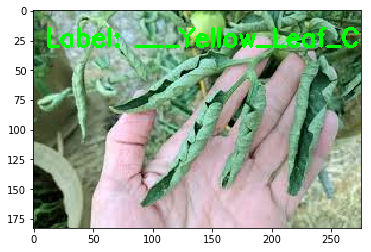

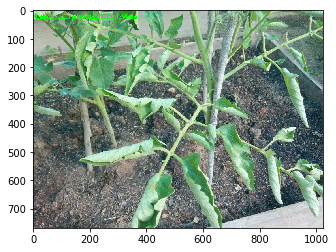

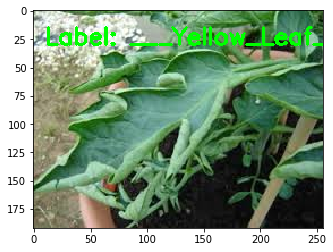

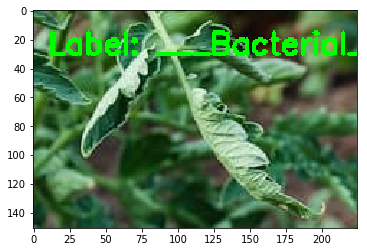

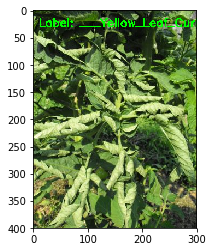

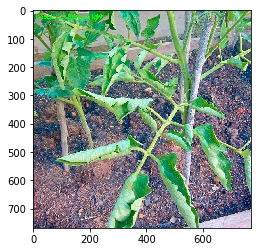

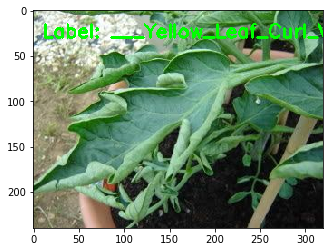

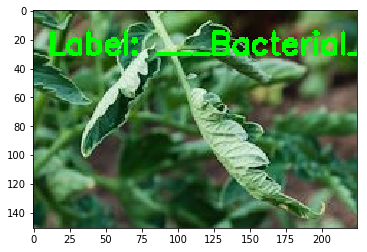

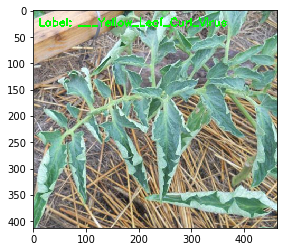

In [18]:
import cv2
import matplotlib.pyplot as plt

# loop over the sample images
for (i, image_path) in enumerate(image_paths):
    # Load the example image, draw the prediction, and display it
    image = plt.imread(image_path)
    cv2.putText(image, "Label: {}".format(class_labels[predictions[i]]), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
    plt.imshow(image)
    plt.show()